In [1]:
import pandas as pd
diabetes = pd.read_csv(r"C:\Users\Pavan\Downloads\diabetes.csv")
diabetes.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [2]:
features = ['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']
label = ['Diabetic']
X, y = diabetes[features].values, diabetes[label].values

for n in range(0,4):
    print("Pateient : ", str(n+1), "\nFeatures : ", list(X[n]), "\nLabel : ", y[n])

Pateient :  1 
Features :  [1354778.0, 0.0, 171.0, 80.0, 34.0, 23.0, 43.50972593, 1.213191354, 21.0] 
Label :  [0]
Pateient :  2 
Features :  [1147438.0, 8.0, 92.0, 93.0, 47.0, 36.0, 21.24057571, 0.158364981, 23.0] 
Label :  [0]
Pateient :  3 
Features :  [1640031.0, 7.0, 115.0, 47.0, 52.0, 35.0, 41.51152348, 0.079018568, 23.0] 
Label :  [0]
Pateient :  4 
Features :  [1883350.0, 9.0, 103.0, 78.0, 25.0, 304.0, 29.58219193, 1.282869847, 43.0] 
Label :  [1]


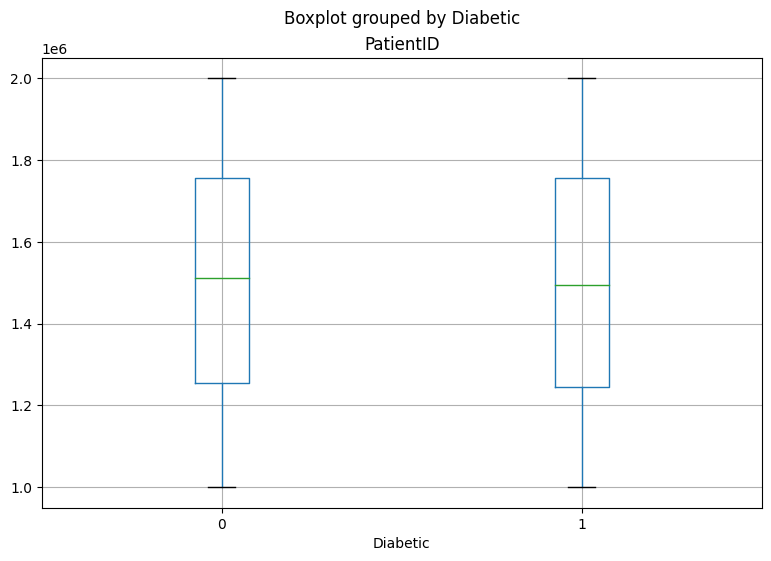

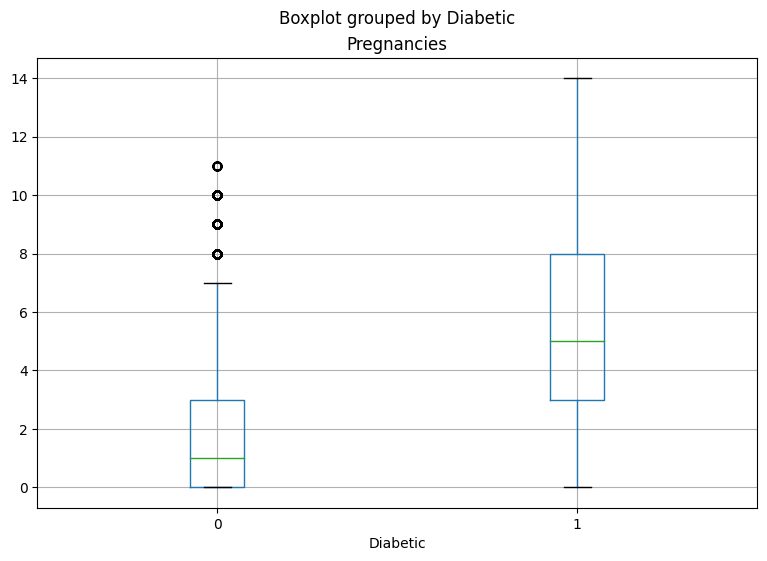

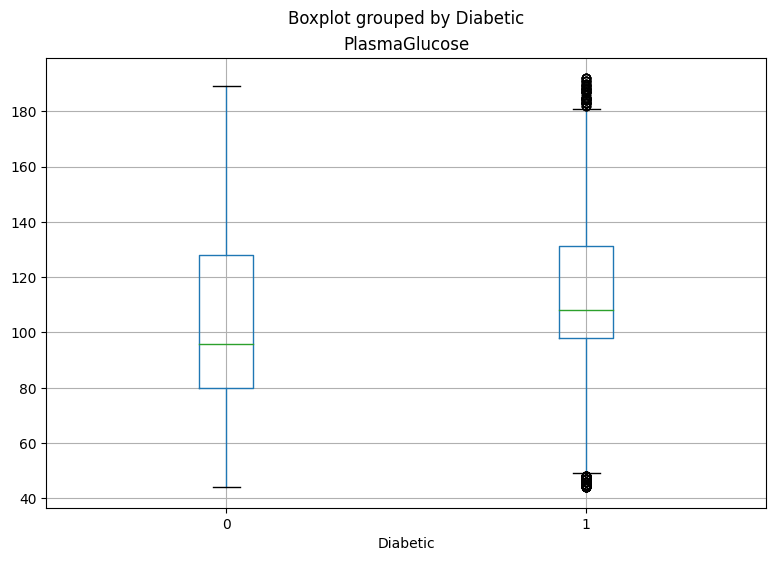

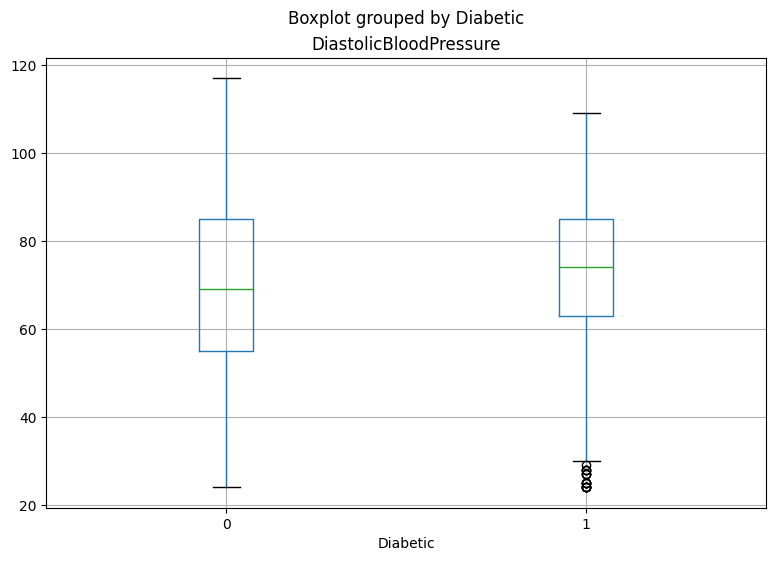

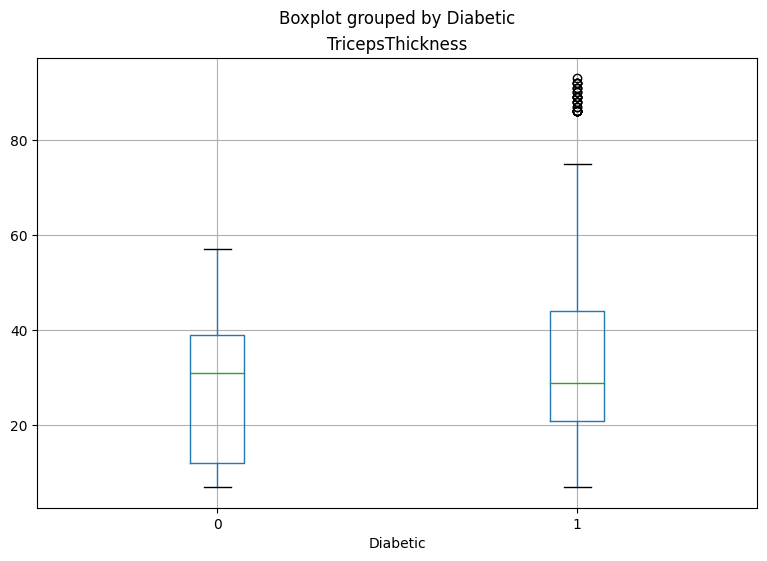

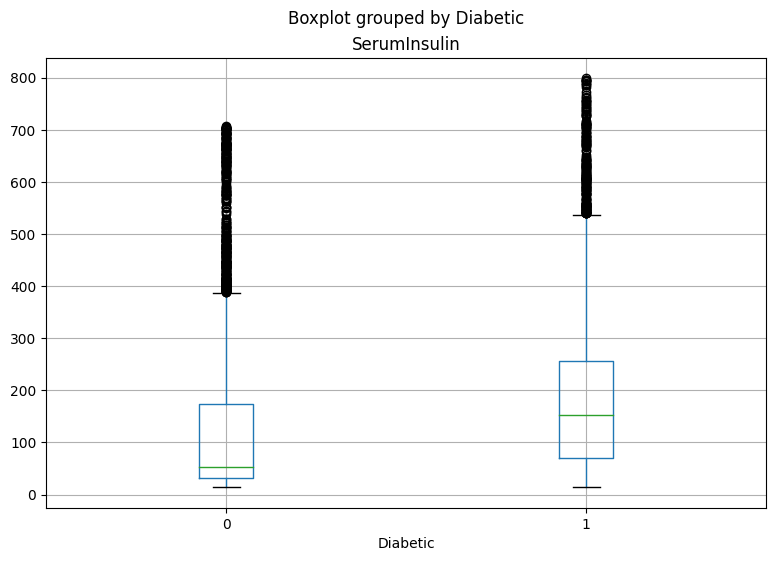

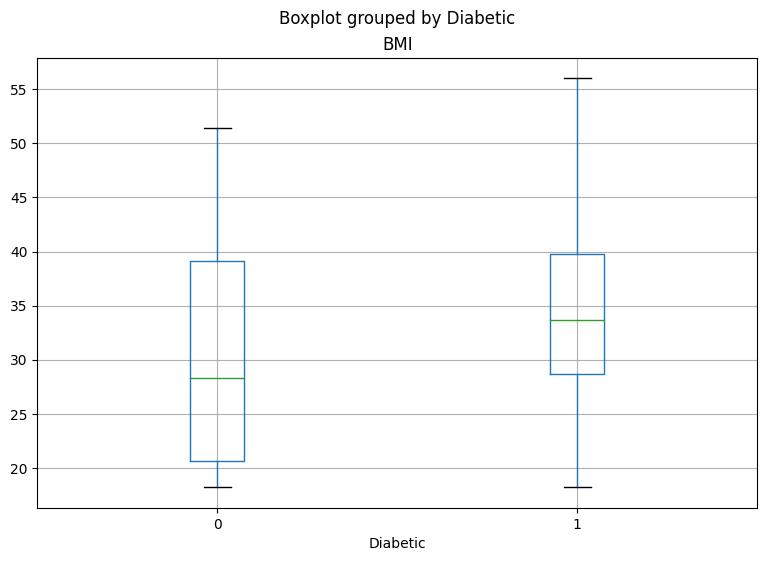

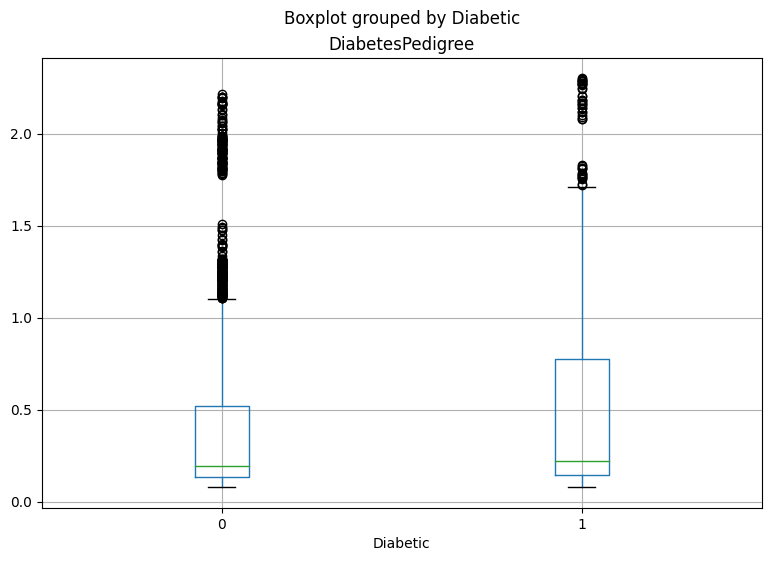

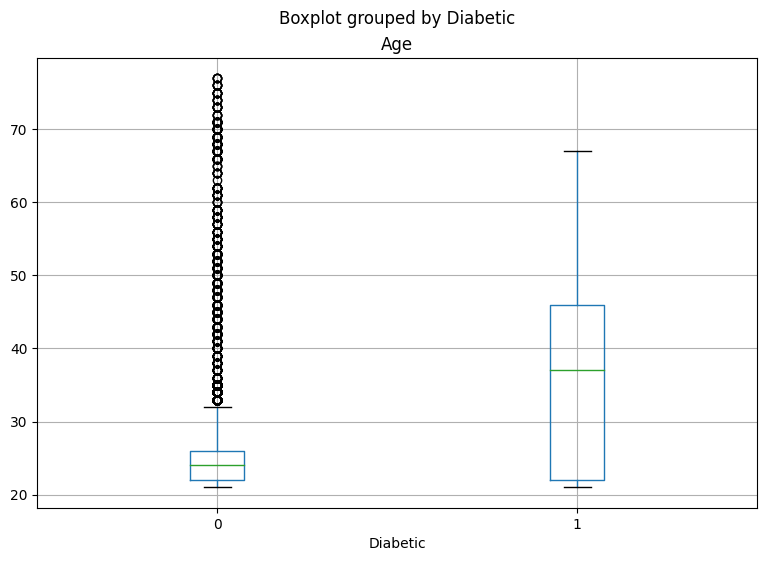

In [3]:
from matplotlib import pyplot as plt
%matplotlib inline

features = ['PatientID', 'Pregnancies', 'PlasmaGlucose', 'DiastolicBloodPressure', 'TricepsThickness', 'SerumInsulin', 'BMI', 'DiabetesPedigree', 'Age']

for col in features:
    diabetes.boxplot(column=col, by="Diabetic", figsize=(9,6))
    plt.title(col)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
print(f"Training Cases : {X_train.shape[0]} \nTest Cases : {X_test.shape[0]}")

Training Cases : 10500 
Test Cases : 4500


In [5]:
from sklearn.linear_model import LogisticRegression
reg = 0.01
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)
print(model)

LogisticRegression(C=100.0, solver='liblinear')


C:\Users\Pavan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [6]:
predictions = model.predict(X_test)
print("Predicted labels : ", predictions)
print("Actual labels : ", y_test)

Predicted labels :  [0 0 0 ... 0 0 0]
Actual labels :  [[0]
 [0]
 [1]
 ...
 [1]
 [1]
 [1]]


In [7]:
from sklearn.metrics import accuracy_score
print("Accuracy : ", accuracy_score(y_test, predictions))

Accuracy :  0.6728888888888889


In [8]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.68      0.97      0.80      2986
           1       0.59      0.09      0.16      1514

    accuracy                           0.67      4500
   macro avg       0.63      0.53      0.48      4500
weighted avg       0.65      0.67      0.58      4500



In [9]:
from sklearn.metrics import precision_score, recall_score
print(f"Overall precision : {precision_score(y_test, predictions)}")
print(f"Overall Recall : {recall_score(y_test, predictions)}")

Overall precision : 0.591304347826087
Overall Recall : 0.08982826948480846


In [10]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predictions)
print(cm)

[[2892   94]
 [1378  136]]


In [11]:
y_score = model.predict_proba(X_test)
print(y_score)

[[0.58669462 0.41330538]
 [0.64357211 0.35642789]
 [0.5890589  0.4109411 ]
 ...
 [0.67773805 0.32226195]
 [0.666771   0.333229  ]
 [0.61434628 0.38565372]]


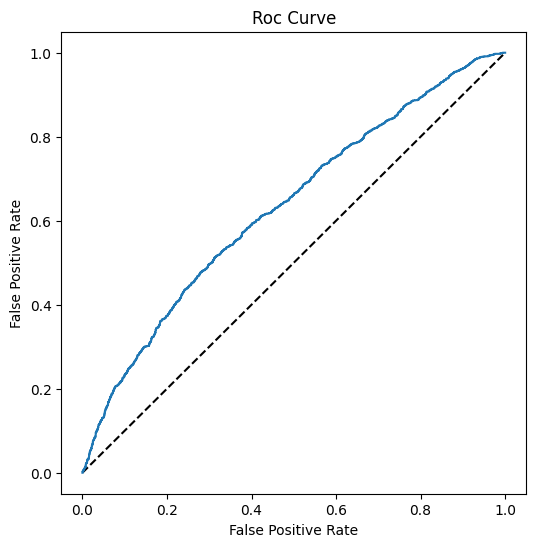

In [12]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as pyplot
%matplotlib inline

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6,6))

plt.plot([0,1],[0,1],'k--')

plt.plot(fpr,tpr)
plt.xlabel("False Positive Rate")
plt.ylabel("False Positive Rate")
plt.title("Roc Curve")
plt.show()

In [13]:
from sklearn.metrics import roc_auc_score
auc = roc_auc_score(y_test, y_score[:,1])
print(f"auc score : {str(auc)}")

auc score : 0.63161596919486


In [14]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np 

numeric_feature = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

categorical_feature = [7]
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[('num', numeric_transformer ,numeric_feature),('cat', categorical_transformer, categorical_feature)])

pipeline = Pipeline(steps=[('prerocessor', preprocessor), ('logregressor', LogisticRegression(C=1/reg, solver='liblinear'))])
model = pipeline.fit(X_train,(y_train))
print(model)

Pipeline(steps=[('prerocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


C:\Users\Pavan\AppData\Roaming\Python\Python310\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusion matrix : [[2571  415]
 [ 767  747]]

Accuracy : 0.7373333333333333
Overall Precision : 0.6428571428571429
Overall Recall : 0.49339498018494055
AUC : 0.8135878042932185


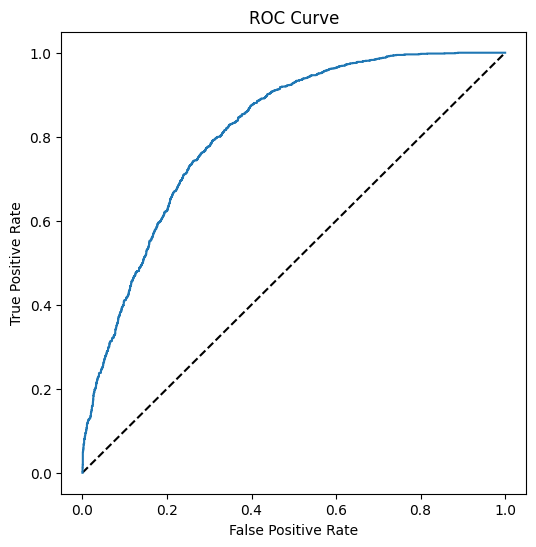

In [15]:
predictions = model.predict(X_test)
y_score = model.predict_proba(X_test)

cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix : {cm}\n")
print(f"Accuracy : {accuracy_score(y_test, predictions)}")
print(f"Overall Precision : {precision_score(y_test, predictions)}")
print(f"Overall Recall : {recall_score(y_test, predictions)}")
auc = roc_auc_score(y_test, y_score[:,1])
print(f"AUC : {str(auc)}")
fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('logregressor', RandomForestClassifier(n_estimators=100))])
model = pipeline.fit(X_train, (y_train))
print(model)

C:\Users\Pavan\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Confusion matrix : [[2849  137]
 [ 240 1274]]

Accuracy : 0.9162222222222223

Overall Precision : 0.9029057406094968

Recall Precision : 0.8414795244385733

AUC : 0.9719334215772237


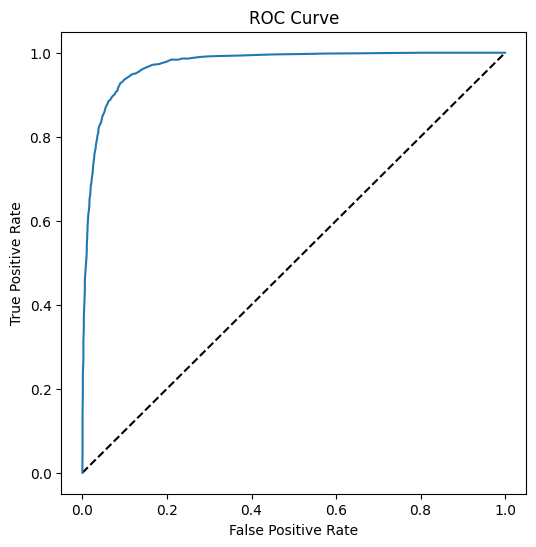

In [17]:
predictions = model.predict(X_test)
y_score = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print(f"Confusion matrix : {cm}\n")
print(f"Accuracy : {accuracy_score(y_test, predictions)}\n")
print(f"Overall Precision : {precision_score(y_test, predictions)}\n")
print(f"Recall Precision : {recall_score(y_test, predictions)}\n")
auc = roc_auc_score(y_test, y_score[:,1])
print(f"AUC : {str(auc)}")

fpr, tpr, thresholds = roc_curve(y_test, y_score[:,1])

fig = plt.figure(figsize=(6, 6))

plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [18]:
import joblib

filename = './diabetes.pkl'
joblib.dump(model, filename)

['./diabetes.pkl']

In [19]:
model = joblib.load(filename)

X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22,13]])
print(f"New sample: {list(X_new[0])}")
pred = model.predict(X_new)

print(f"Predicted Class is : {pred[0]}")

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0, 13.0]
Predicted Class is : 0
